Muhammad Nur Maajid_1103228145

---


Mohammad Jody Hermawan_1103228241

---


Khairi Hibatullah Ridho_1103228240

Struktur Dataset
1. num_passengers = number of passengers travelling
2. sales_channel = sales channel booking was made on
3. trip_type = trip Type (Round Trip, One Way, Circle Trip)
4. purchase_lead = number of days between travel date and booking date
5. length_of_stay = number of days spent at destination
6. flight_hour = hour of flight departure
7. flight_day = day of week of flight departure
8. route = origin -> destination flight route
9. booking_origin = country from where booking was made
10. wants_extra_baggage = if the customer wanted extra baggage in the booking
11. wants_preferred_seat = if the customer wanted a preferred seat in the booking
12. wants_in_flight_meals = if the customer wanted in-flight meals in the booking
13. flight_duration = total duration of flight (in hours)
14. booking_complete = flag indicating if the customer completed the booking


#Exploring Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import dodge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Dataset/customer_booking.csv'
df = pd.read_csv(data_path, encoding='latin1')

Mounted at /content/drive


1. Exploring Data.

In [ ]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [ ]:
df.tail(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49990,1,Internet,RoundTrip,12,6,10,Sat,PERPNH,Australia,0,0,0,5.62,0
49991,1,Internet,RoundTrip,8,6,6,Mon,PERPNH,Australia,0,1,0,5.62,0
49992,1,Internet,RoundTrip,14,6,12,Fri,PERPNH,Australia,1,0,0,5.62,0
49993,1,Internet,RoundTrip,19,6,12,Sun,PERPNH,Australia,1,0,0,5.62,0
49994,2,Internet,RoundTrip,25,6,9,Sun,PERPNH,Australia,0,0,0,5.62,0
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


2. Checking the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The Dataset contain mulitple objects, int64 and float64 data types.

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


3. Checking For Null Values in the dataset.

In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

4. Checking the unique values in columns obtain object64 data types

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R\x82union', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanma

5. Hence there is a spelling mistake in booking origin Replacing it with correct spellings.

In [ ]:
df['booking_origin'] = df['booking_origin'].replace('R\x82union','Reunion')

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Reunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

6. Checking data of specific Value in booking_origin column for '(not set)'

In [ ]:
target_value = '(not set)'
filtered_df = df[df['booking_origin'] ==target_value]
filtered_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
252,2,Internet,RoundTrip,14,17,10,Sat,AKLKUL,(not set),1,0,0,8.83,1
1147,3,Internet,RoundTrip,40,17,0,Fri,AKLKUL,(not set),0,0,0,8.83,0
4547,1,Internet,RoundTrip,29,38,20,Wed,CKGTRZ,(not set),1,0,1,4.83,0
6311,2,Internet,RoundTrip,197,42,1,Thu,COKMEL,(not set),1,1,1,8.83,0
6518,2,Internet,RoundTrip,248,24,22,Fri,COKOOL,(not set),1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45921,2,Internet,RoundTrip,60,6,11,Mon,HGHHKT,(not set),1,0,0,5.07,0
46007,1,Internet,RoundTrip,163,6,1,Mon,HGHSIN,(not set),0,0,0,5.07,0
46043,1,Internet,RoundTrip,5,6,14,Fri,HGHTRZ,(not set),1,1,0,5.07,1
46847,1,Internet,RoundTrip,46,6,16,Wed,HNDPEN,(not set),1,0,0,7.57,1


In [ ]:
df['flight_duration'].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [ ]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
df.select_dtypes(include=['object']).head(10)

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
5,Internet,RoundTrip,Thu,AKLDEL,New Zealand
6,Internet,RoundTrip,Thu,AKLDEL,New Zealand
7,Internet,RoundTrip,Mon,AKLDEL,India
8,Internet,RoundTrip,Mon,AKLDEL,New Zealand
9,Mobile,RoundTrip,Sun,AKLDEL,India


In [ ]:
df2 = df.select_dtypes(include=['number']).head(10)
df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
5,1,3,48,20,1,0,1,5.52,0
6,3,201,33,6,1,0,1,5.52,0
7,2,238,19,14,1,0,1,5.52,0
8,1,80,22,4,0,0,1,5.52,0
9,1,378,30,12,0,0,0,5.52,0


In [ ]:
df.drop_duplicates()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


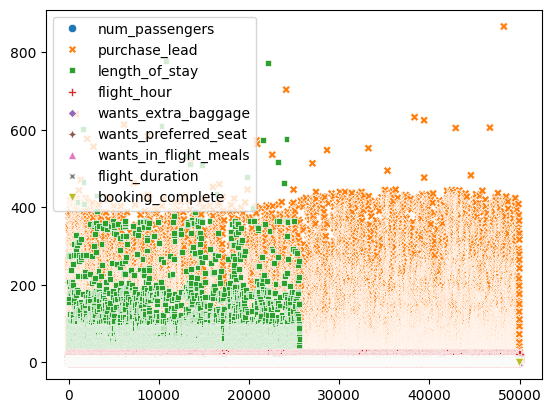

In [ ]:
sns.scatterplot(df)

7. Checking Co-relation of the variables.

In [ ]:
corr_matrix = df2.corr()
corr_matrix

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.283864,-0.201608,0.098305,0.738549,0.201008,0.123091,NaN,NaN
purchase_lead,0.283864,1.000000,-0.348299,0.002023,0.012035,0.229994,-0.606617,NaN,NaN
length_of_stay,-0.201608,-0.348299,1.000000,0.355698,0.080011,-0.176771,0.362402,NaN,NaN
flight_hour,0.098305,0.002023,0.355698,1.000000,0.623492,0.388959,0.063050,NaN,NaN
wants_extra_baggage,0.738549,0.012035,0.080011,0.623492,1.000000,0.272166,0.166667,NaN,NaN
wants_preferred_seat,0.201008,0.229994,-0.176771,0.388959,0.272166,1.000000,-0.408248,NaN,NaN
wants_in_flight_meals,0.123091,-0.606617,0.362402,0.063050,0.166667,-0.408248,1.000000,NaN,NaN
flight_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='purchase_lead', ylabel='flight_hour'>

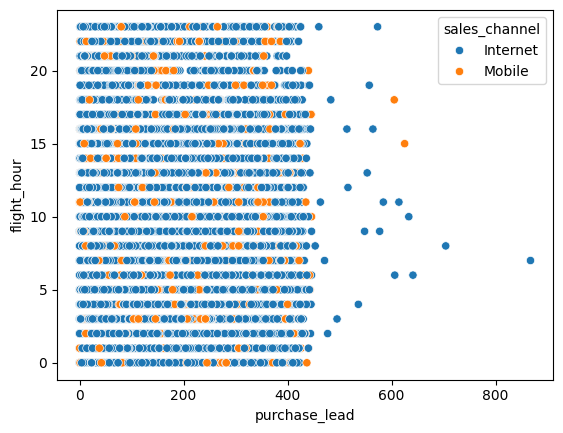

In [ ]:
sns.scatterplot(df, x= 'purchase_lead', y='flight_hour',hue='sales_channel')

#wants extra baggage prediction

In [ ]:
df = pd.get_dummies(df, columns=["sales_channel", "trip_type", "flight_day", "route", "booking_origin"], drop_first= True)

In [ ]:
y = df["wants_extra_baggage"]
x = df.drop("wants_extra_baggage", axis= 1)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.85, random_state= 42)

RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

model = rf.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("Model Skor: ", score)

Model Skor:  0.7230666666666666


In [ ]:
cross_val = cross_val_score(model, x, y, cv = 4)

In [ ]:
cross_val

array([0.67344, 0.42776, 0.3492 , 0.53424])

In [ ]:
cross_val.mean()

0.49616

XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("XGBoost Model Score: ", score)

XGBoost Model Score:  0.7282666666666666


In [ ]:
# Cross-validation
cross_val = cross_val_score(xgb_model, x, y, cv=4)
print("Cross-validation scores: ", cross_val)
print("Cross-validation mean: ", cross_val.mean())

Cross-validation scores:  [0.67096 0.43144 0.314   0.44808]
Cross-validation mean:  0.46612000000000003


LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier()

lgb_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28406, number of negative: 14094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 42500, number of used features: 412
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.668376 -> initscore=0.700851
[LightGBM] [Info] Start training from score 0.700851


LGBMClassifier()

In [ ]:
# Evaluate the model
y_pred = lgb_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("LightGBM Model Score: ", score)

LightGBM Model Score:  0.7289333333333333


In [ ]:
# Cross-validation
cross_val = cross_val_score(lgb_model, x, y, cv=4)
print("Cross-validation scores: ", cross_val)
print("Cross-validation mean: ", cross_val.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25079, number of negative: 12421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 37500, number of used features: 367
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.668773 -> initscore=0.702642
[LightGBM] [Info] Start training from score 0.702642
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25079, number of negative: 12421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred = ada_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("AdaBoost Model Score: ", score)

AdaBoost Model Score:  0.7193333333333334


In [ ]:
cross_val = cross_val_score(ada_model, x, y, cv=4)
print("Cross-validation scores: ", cross_val)
print("Cross-validation mean: ", cross_val.mean())

Cross-validation scores:  [0.67136 0.52448 0.34248 0.48648]
Cross-validation mean:  0.5062


SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

In [ ]:
svm_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [ ]:
y_pred = svm_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("SVM Model Score: ", score)

SVM Model Score:  0.7049333333333333


In [ ]:
cross_val = cross_val_score(svm_model, x, y, cv=4)
print("Cross-validation scores: ", cross_val)
print("Cross-validation mean: ", cross_val.mean())